<a href="https://colab.research.google.com/github/pawanraje16/CVDLlab/blob/main/yolov3_using_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np

In [ ]:
# Load YOLOv3 model
weights_path = "/content/yolov3.weights"
config_path = "/content/weight.crdownload"
names_path = "coco.names"

In [ ]:
# Load class labels
with open(names_path, "r") as f:
    classes = f.read().strip().split("\n")

In [ ]:
# Load YOLO network
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [ ]:
# Load image
image_path = "input.jpg"  # Change this to your image path
image = cv2.imread(image_path)
height, width = image.shape[:2]

In [ ]:
# Convert image to blob
blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False)
net.setInput(blob)

In [ ]:
# Get layer names and output layers
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

In [ ]:
print("Output Layers:", output_layers)


Output Layers: ['yolo_82', 'yolo_94', 'yolo_106']


In [ ]:
# Forward pass
layer_outputs = net.forward(output_layers)

In [ ]:
# Initialize lists
boxes, confidences, class_ids = [], [], []

In [ ]:
# Process each detection
for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:  # Confidence threshold
            box = detection[:4] * np.array([width, height, width, height])
            center_x, center_y, w, h = box.astype("int")

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, int(w), int(h)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [ ]:
print(f"Detected {len(boxes)} objects before NMS")

Detected 14 objects before NMS


In [ ]:
# Apply Non-Maximum Suppression (NMS)
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.3, 0.2)

In [ ]:
print(f"Final {len(indices)} objects after NMS")

Final 3 objects after NMS


In [ ]:
# Draw bounding boxes
if len(indices) > 0:
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
        color = (0, 255, 0)

        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

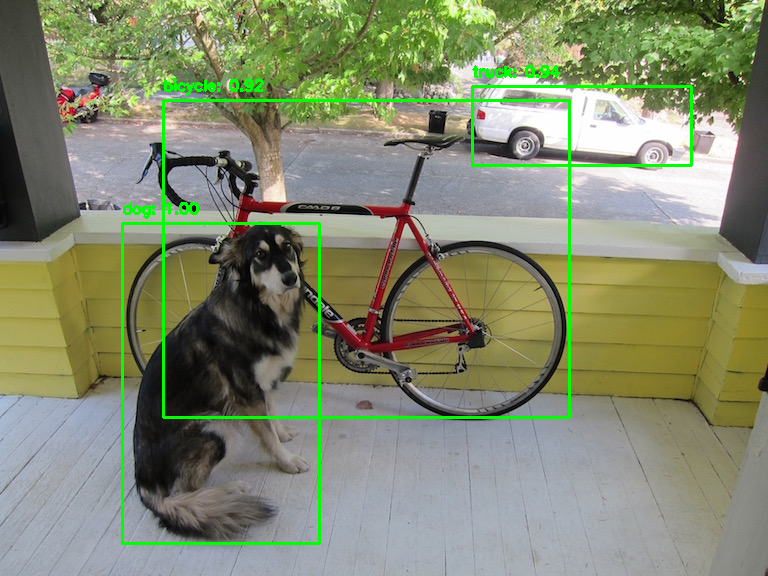

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(image)